In [ ]:
from google .colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 101s 62ms/step - loss: 1.5290 - accuracy: 0.4417 - val_loss: 1.2362 - val_accuracy: 0.5530
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1677 - accuracy: 0.5870 - val_loss: 1.1138 - val_accuracy: 0.6110
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0115 - accuracy: 0.6476 - val_loss: 0.9951 - val_accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9105 - accuracy: 0.6823 - val_loss: 0.9286 - val_accuracy: 0.6767
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8395 - accuracy: 0.7034 - val_loss: 0.9021 - val_accuracy: 0.6792
Epoch 6/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7753 - accuracy: 0.7274 - val_loss: 0.8768 - val_accuracy: 0.6963
Epoch 7/10
1563/1563 [==============================] - 

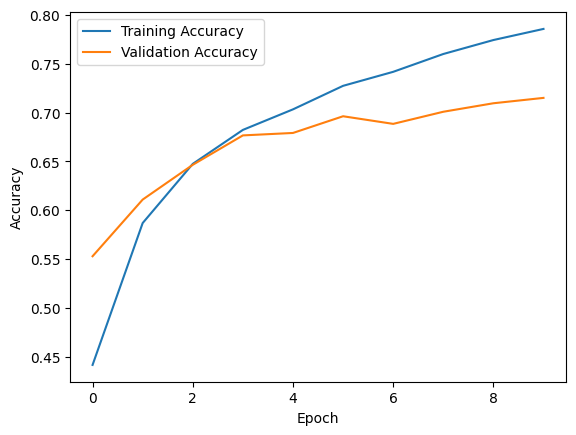

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset (for demonstration, using CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Monkeypox_dataset_22/Monkeypox_dataset_22/Monkeypox/Train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Monkeypox_dataset_22/Monkeypox_dataset_22/Monkeypox/Test'


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(1):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

Working with 35 images
Image examples: 
15.jfif


ValueError: ignored

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Monkeypox_dataset_22/Monkeypox_dataset_22/Monkeypox/*')
print(len(folders))


8


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 0 images belonging to 0 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 0 images belonging to 0 classes.


In [ ]:
feature_extractor= vgg.predict(train_set)

ValueError: ignored

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
X_for_RF = features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
SIZE = 224
train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Custom/dataset/train/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(fruit_label)

/content/drive/MyDrive/Colab Notebooks/Custom/dataset/train/first_train/00000_00.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/train/first_train/00000_01.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/train/first_train/00000_02.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/train/second_train/00000_03.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/train/second_train/00000_04.jpg


In [ ]:
train_images = np.array(train_images)
print(train_images)
train_labels = np.array(train_labels)
print(train_labels)

[[[[254 254 254]
   [254 254 254]
   [255 255 255]
   ...
   [255 255 255]
   [254 254 254]
   [252 252 252]]

  [[254 254 254]
   [254 254 254]
   [255 255 255]
   ...
   [245 245 245]
   [236 236 236]
   [229 229 229]]

  [[254 254 254]
   [254 254 254]
   [255 255 255]
   ...
   [232 232 232]
   [215 215 215]
   [200 200 200]]

  ...

  [[252 252 252]
   [253 253 253]
   [254 254 254]
   ...
   [248 248 248]
   [240 240 240]
   [228 228 228]]

  [[253 253 253]
   [254 254 254]
   [255 255 255]
   ...
   [254 254 254]
   [232 232 232]
   [203 203 203]]

  [[254 254 254]
   [254 254 254]
   [255 255 255]
   ...
   [254 254 254]
   [222 222 222]
   [181 181 181]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [180 180 180]
   [184 184 184]
   [186 186 186]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [145 145 145]
   [146 146 146]
   [148 148 148]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [128 128 128]
   [125 125 125]
   [125 125

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
RF_model.fit(X_for_RF,train_labels_encoded)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
X_test_feature = vgg.predict(test_set)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

1/1 [==============================] - 3s 3s/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
SIZE = 224
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Custom/dataset/test/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

/content/drive/MyDrive/Colab Notebooks/Custom/dataset/test/first/00000_06 (1).jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/test/first/00000_07.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/test/first/00000_08.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/test/second/00000_09.jpg
/content/drive/MyDrive/Colab Notebooks/Custom/dataset/test/second/00000_10.jpg


In [ ]:
test_images = np.array(test_images)
print(test_images)
test_labels = np.array(test_labels)
print(test_labels)

[[[[255 255 255]
   [255 255 255]
   [254 254 254]
   ...
   [240 240 240]
   [228 228 228]
   [191 191 191]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [218 218 218]
   [217 217 217]
   [223 223 223]]

  [[251 251 251]
   [251 251 251]
   [251 251 251]
   ...
   [157 157 157]
   [180 180 180]
   [231 231 231]]

  ...

  [[251 251 251]
   [251 251 251]
   [239 239 239]
   ...
   [243 243 243]
   [240 240 240]
   [240 240 240]]

  [[232 232 232]
   [209 209 209]
   [181 181 181]
   ...
   [250 250 250]
   [247 247 247]
   [243 243 243]]

  [[206 206 206]
   [151 151 151]
   [107 107 107]
   ...
   [255 255 255]
   [253 253 253]
   [251 251 251]]]


 [[[103 103 103]
   [186 186 186]
   [249 249 249]
   ...
   [254 254 254]
   [254 254 254]
   [255 255 255]]

  [[ 44  44  44]
   [ 81  81  81]
   [137 137 137]
   ...
   [254 254 254]
   [255 255 255]
   [255 255 255]]

  [[  0   0   0]
   [  2   2   2]
   [ 38  38  38]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [ ]:
prediction_RF = RF_model.predict(X_test_features)
print(prediction_RF)

[0 0 0 1 1]


In [ ]:
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels,prediction_RF))

Accuracy =  0.0


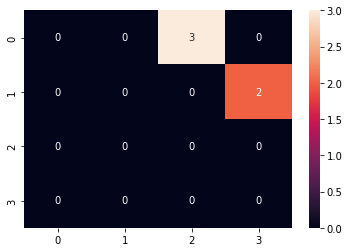

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)

In [ ]:
n=np.random.randint(0, test_set.shape[0])
img = test_set[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

AttributeError: ignored

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h2',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

ValueError: ignored

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()